In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## read images 

In [0]:
import cv2
import numpy as np
import pandas as pd
#import tensorflow as tf
  
import gzip
import pickle
import csv
from scipy.spatial import distance as dist
import imutils
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


train_images = pd.read_pickle('/content/drive/My Drive/proj3/modified-mnist//train_max_x')
test_images = pd.read_pickle('/content/drive/My Drive/proj3/modified-mnist//test_max_x')
train_labels = pd.read_csv("/content/drive/My Drive/proj3/modified-mnist//train_max_y.csv")


## model trainning and predict

In [3]:
import cv2
import numpy as np
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop, Adam
from keras.utils import np_utils
from pandas import DataFrame
from scipy import ndimage
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
from tensorflow import keras
from keras.models import Sequential
from keras import datasets, layers, models

def vgg16(_numClass, _datasize):
    numClass = _numClass
    datasize = _datasize
    opt = Adam()

    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(datasize, datasize, 1)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    

    model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(2048,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

    return model

Using TensorFlow backend.


In [0]:
numClass = 10
datasize = 128
epochs = 50
batch_size = 128

X_train = np.divide(train_images, 255.0)
X_train = X_train[:,:,:,np.newaxis]

y_train = np.asarray(train_labels)[:,1]

(trainData, testData, trainLabels, testLabels) = train_test_split(X_train, y_train, test_size=0.33, shuffle=True)

y_train = np_utils.to_categorical(y_train, numClass)
trainLabels = keras.utils.to_categorical(trainLabels, numClass)
testLabels = keras.utils.to_categorical(testLabels, numClass)


In [5]:
from keras.callbacks import History 
history = History()

print("[INFO] compiling model...")

model = vgg16(numClass, datasize)
history = model.fit(trainData, trainLabels, batch_size=batch_size, shuffle=True, epochs=epochs, verbose=1,validation_data=(testData, testLabels))

#model.fit(X_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, verbose=1)

[INFO] compiling model...












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 33500 samples, validate on 16500 samples
Epoch 1/50
33500/33500 [==============================] - 63s 2ms/step - loss: 1.9701 - acc: 0.2444 - val_loss: 1.8808 - val_acc: 0.2697
Epoch 2/50
33500/33500 [==============================] - 56s 2ms/step - loss: 1.7105 - acc: 0.3321 - val_loss: 2.6101 - val_acc: 0.1747
Epoch 3/50
33500/33500 [==============================] - 56s 2ms/step - loss: 1.3876 - acc: 0.4408 - val_loss: 2.6209 - val_acc: 0.2517
Epoch 4/50
33500/33500 [==============================] - 55s 2ms/step - loss: 1.0719 - acc: 0.6296 - val_loss: 0.9714 - val_acc: 0.6579
Epoch 5/50
33500/33500 [==============================] - 55s 2ms/step - loss: 0.7828 - acc: 0.7328 - val_loss: 0.6615 - val_acc: 0.7796
Epoch 6/50
335

KeyboardInterrupt: ignored

In [0]:
X_test = np.divide(test_images, 255.0)
X_test = X_test[:,:,:,np.newaxis]

predicted = model.predict(X_test, verbose=1)

10000/10000 [==============================] - 8s 805us/step


In [0]:
result = np.zeros(len(predicted))
predict = np.asarray(predicted)

In [0]:
for i in range(len(predict)):
    index = predict[i].argmax()
    #print(index)
    result[i] = index
    
result = result.astype(int)
print(result[:100])

[9 6 4 9 6 8 2 4 5 9 4 9 8 9 9 6 8 7 4 6 7 7 6 5 8 9 5 6 8 6 7 9 3 8 7 6 9
 5 8 8 9 2 8 9 9 4 8 9 9 9 3 7 7 9 7 4 8 6 6 9 8 3 9 9 8 8 8 3 7 1 7 9 7 8
 9 7 9 5 6 2 8 9 7 6 9 9 8 7 7 9 7 9 5 8 8 9 5 5 7 8]


In [0]:
id_list = []
for i in range(10000):
    id_list.append(i)

name=['Id','Label']
test=pd.DataFrame(columns=name)
test['Id'] = id_list
test['Label'] = result
test.to_csv('/content/drive/My Drive/proj3/result2.csv',index=None, header=True)
test

,Id,Label
0,0,9
1,1,6
2,2,4
3,3,9
4,4,6
...,...,...
9995,9995,7
9996,9996,9
9997,9997,7
9998,9998,6


In [0]:
print(type(history))

<class 'keras.callbacks.History'>


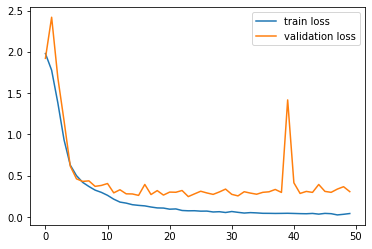

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']
xc         = range(50)

plt.figure()
l1, = plt.plot(xc, train_loss)
l2, = plt.plot(xc, val_loss)
plt.legend(handles=[l1,l2],labels=['train loss','validation loss'],loc='best')

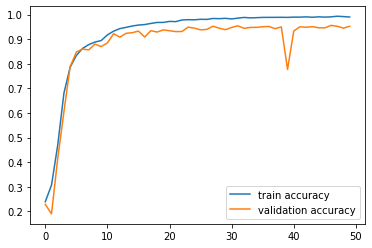

In [0]:
plt.figure()
l1, = plt.plot(xc, train_acc)
l2, = plt.plot(xc, val_acc)
plt.legend(handles=[l1,l2],labels=['train accuracy','validation accuracy'],loc='best')